 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [412]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [413]:
wr_csv = Path("Resources/whale_returns.csv")

In [414]:
wr_df = pd.read_csv(wr_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [415]:
# Reading whale returns
wr_df = wr_df.sort_index()
wr_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [416]:
# Count nulls
wr_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [417]:
# Drop nulls
wr_df.dropna(inplace=True)
wr_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [418]:
# Reading algorithmic returns
ar_csv = Path("Resources/algo_returns.csv")
ar_df = pd.read_csv(ar_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
ar_df = ar_df.sort_index()
ar_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [419]:
# Count nulls
ar_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [420]:
# Drop nulls
ar_df.dropna(inplace=True)
ar_df.isnull().sum()
ar_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [421]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_csv = Path("Resources/sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(sp_tsx_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_tsx_df = sp_tsx_df.sort_index()
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [422]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [423]:
# Fix Data Types
sp_tsx_df['Close'] =  sp_tsx_df['Close'].str.replace('$', '')
sp_tsx_df['Close'] =  sp_tsx_df['Close'].str.replace(',', '')
sp_tsx_df['Close'] = sp_tsx_df['Close'].astype('float')

sp_tsx_df.head()
sp_tsx_df.dtypes

Close    float64
dtype: object

In [424]:
# Calculate Daily Returns
daily_returns = sp_tsx_df.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [425]:
# Drop nulls
daily_returns.dropna(inplace=True)
daily_returns.isnull().sum()

Close    0
dtype: int64

In [426]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns = daily_returns.rename(columns={'Close': 'SP_TSX'})

daily_returns.head()

,SP_TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [427]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio1_daily_returns = pd.concat(
    [wr_df, ar_df, daily_returns], axis="columns", join="inner"
)
#Sort by date
portfolio1_daily_returns = portfolio1_daily_returns.sort_index()

portfolio1_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

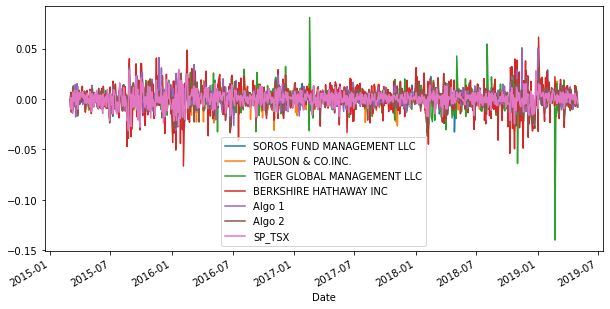

In [428]:
# Plot daily returns of all portfolios
portfolio1_daily_returns.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

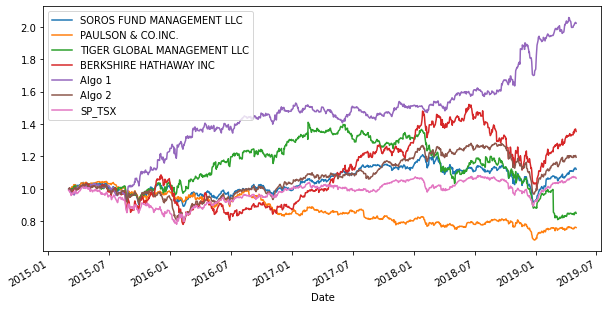

In [429]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+portfolio1_daily_returns).cumprod()
cumulative_returns.tail()
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5)) 

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

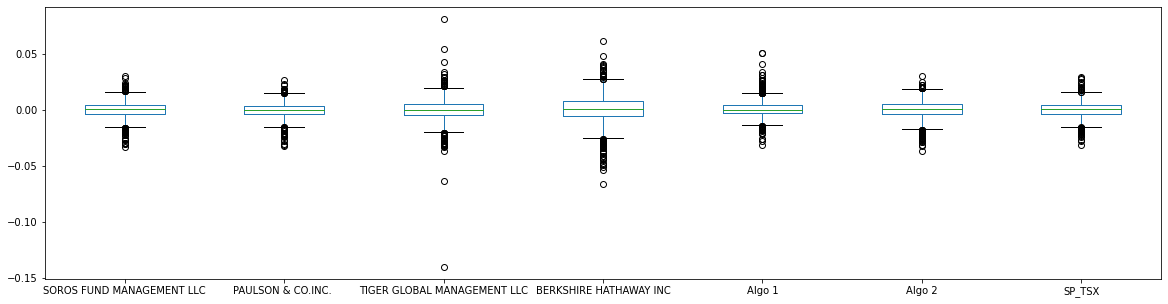

In [430]:
# Box plot to visually show risk
portfolio1_daily_returns.plot.box(figsize=(20,5)) 

### Calculate Standard Deviations

In [431]:
# Calculate the daily standard deviations of all portfolios
portfolio1_daily_std = portfolio1_daily_returns.std()
portfolio1_daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP_TSX                         0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [432]:
# Calculate  the daily standard deviation of S&P TSX 60
# Determine which portfolios are riskier than the S&P TSX 60
list_portfolios = portfolio1_daily_std.sort_values(ascending=False)

riskier_portfolios = {}
##The following loop saves the portfolios with higher std than SP_TSX into a separate dicitionary
for portfolio in list_portfolios.keys():
    if list_portfolios[portfolio] > list_portfolios['SP_TSX']:
        riskier_portfolios[portfolio] = list_portfolios[portfolio]
        
riskier_portfolios

{'BERKSHIRE HATHAWAY INC': 0.012825516031663257,
 'TIGER GLOBAL MANAGEMENT LLC': 0.01088278573581953,
 'Algo 2': 0.008326359992689736,
 'SOROS FUND MANAGEMENT LLC': 0.00782757654123399,
 'Algo 1': 0.007588882996571348}

### Calculate the Annualized Standard Deviation

In [433]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SP_TSX                         0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

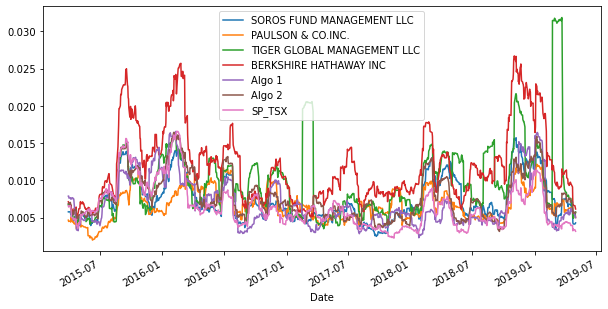

In [434]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = portfolio1_daily_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(10,5))

### Calculate and plot the correlation

<AxesSubplot:>

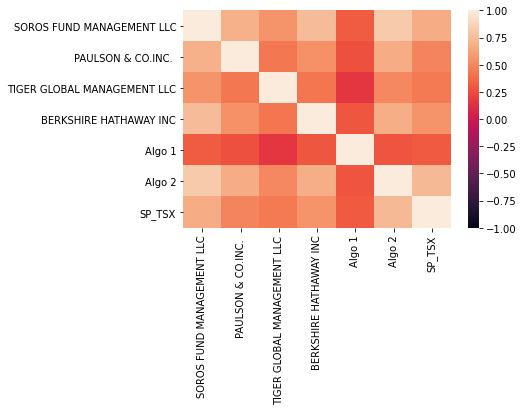

In [435]:
# Calculate the correlation
correlation = portfolio1_daily_returns.corr() 
# Display de correlation matrix
import seaborn as sns

sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of SOROS'}, xlabel='Date'>

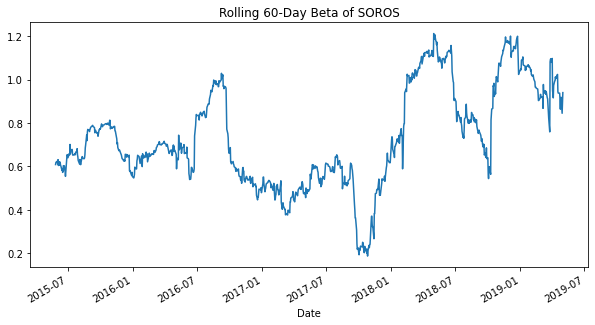

In [436]:
# Calculate covariance of a single portfolio
covariance = portfolio1_daily_returns['SOROS FUND MANAGEMENT LLC'].cov(portfolio1_daily_returns['SP_TSX'])
covariance
# Calculate variance of S&P TSX
variance = portfolio1_daily_returns['SP_TSX'].var()
variance
# Computing beta
soros_beta = covariance / variance
soros_beta
# Plot beta trend
rolling_covariance = portfolio1_daily_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(portfolio1_daily_returns['SP_TSX'])
rolling_variance = portfolio1_daily_returns['SP_TSX'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(10, 5), title='Rolling 60-Day Beta of SOROS')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [437]:
# Use `ewm` to calculate the rolling window
portfolio_ewm = portfolio1_daily_returns.ewm(halflife='21 days', times=portfolio1_daily_returns.index).mean()

portfolio_ewm.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.005908
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.003410
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005133
2015-03-09,-0.000496,0.000724,-0.000524,-0.002121,-0.004415,-0.000903,-0.005452


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [438]:
# Annualized Sharpe Ratios
sharpe_ratios = (
    portfolio1_daily_returns.mean() * 252 / (portfolio1_daily_returns.std() * np.sqrt(252))
)

sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP_TSX                         0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

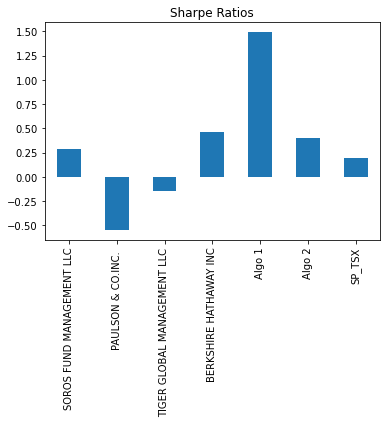

In [439]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo 1 outperforms the rest.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [440]:
# Reading data from 1st stock
nvd_csv = Path("Resources/NVIDIA.csv")
nvd_df = pd.read_csv(nvd_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

##Convert to date value (gets rid of closing time date e.g. 16:00) but this operation tends to convert the date type to object type
nvd_df.index = nvd_df.index.date

##Convert the Date column back to datetime type
nvd_df.index = pd.to_datetime(nvd_df.index, infer_datetime_format=True)

##Sort by index (Date)
nvd_df = nvd_df.sort_index()

##Rename column header to NVIDIA
nvd_df = nvd_df.rename(columns={'Close': 'NVIDIA'})

nvd_df.head()

,NVIDIA
2018-01-02,199.35
2018-01-03,212.47
2018-01-04,213.59
2018-01-05,215.40
2018-01-08,222.00


In [441]:
# Reading data from 2nd stock
tsl_csv = Path("Resources/TESLA.csv")
tsl_df = pd.read_csv(tsl_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

##Convert to date value (gets rid of closing time date e.g. 16:00) but this operation tends to convert the date type to object type
tsl_df.index = tsl_df.index.date

##Convert the Date column back to datetime type
tsl_df.index = pd.to_datetime(tsl_df.index, infer_datetime_format=True)

##Sort by index (Date)
tsl_df = tsl_df.sort_index()

##Rename column header to TESLA
tsl_df = tsl_df.rename(columns={'Close': 'TESLA'})

tsl_df.head()

,TESLA
2018-01-02,64.11
2018-01-03,63.45
2018-01-04,62.92
2018-01-05,63.32
2018-01-08,67.28


In [442]:
# Reading data from 3rd stock
nfx_csv = Path("Resources/NETFLIX.csv")
nfx_df = pd.read_csv(nfx_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

##Convert to date value (gets rid of closing time date e.g. 16:00) but this operation tends to convert the date type to object type
nfx_df.index = nfx_df.index.date

##Convert the Date column back to datetime type
nfx_df.index = pd.to_datetime(nfx_df.index, infer_datetime_format=True)

##Sort by index (Date)
nfx_df = nfx_df.sort_index()

##Rename column header to NETFLIX
nfx_df = nfx_df.rename(columns={'Close': 'NETFLIX'})

nfx_df.head()

,NETFLIX
2018-01-02,201.07
2018-01-03,205.05
2018-01-04,205.63
2018-01-05,209.99
2018-01-08,212.05


In [443]:
# Combine all stocks in a single DataFrame
nasdaq_combined = pd.concat(
    [nfx_df, tsl_df, nvd_df], axis="columns", join="inner"
)
nasdaq_combined.head()

,NETFLIX,TESLA,NVIDIA
2018-01-02,201.07,64.11,199.35
2018-01-03,205.05,63.45,212.47
2018-01-04,205.63,62.92,213.59
2018-01-05,209.99,63.32,215.40
2018-01-08,212.05,67.28,222.00


In [444]:
# Reset Date index

#Already done above

In [445]:
# Reorganize portfolio data by having a column per symbol

#Already done above

In [446]:
# Calculate daily returns
nasdaq_daily_returns = nasdaq_combined.pct_change()

# Drop NAs
nasdaq_daily_returns.dropna(inplace=True)
##nasdaq_daily_returns.isnull().sum()

# Display sample data
nasdaq_daily_returns.head()

,NETFLIX,TESLA,NVIDIA
2018-01-03,0.019794,-0.010295,0.065814
2018-01-04,0.002829,-0.008353,0.005271
2018-01-05,0.021203,0.006357,0.008474
2018-01-08,0.009810,0.062539,0.030641
2018-01-09,-0.012921,-0.008026,-0.000270


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:>

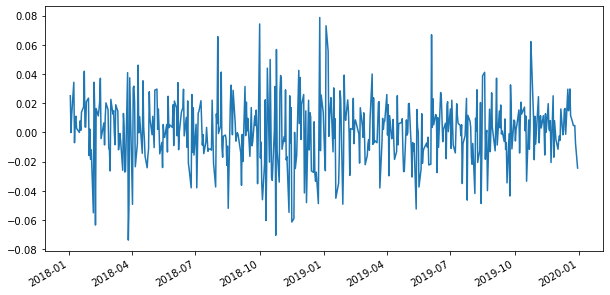

In [447]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = nasdaq_daily_returns.dot(weights)

# Display sample data
portfolio_returns.plot(figsize=(10, 5))

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [448]:
# Join your returns DataFrame to the original returns DataFrame
all_combined = pd.concat(
    [nasdaq_daily_returns, portfolio1_daily_returns], axis="columns", join="inner"
)
all_combined.head()

,NETFLIX,TESLA,NVIDIA,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
2018-01-03,0.019794,-0.010295,0.065814,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.002829,-0.008353,0.005271,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,0.021203,0.006357,0.008474,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.009810,0.062539,0.030641,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.012921,-0.008026,-0.000270,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


In [449]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
##inner join must have taken care of that
all_combined.isnull().sum()


NETFLIX                        0
TESLA                          0
NVIDIA                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP_TSX                         0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [450]:
# Calculate the annualized `std`
annualized_std = all_combined.std() * np.sqrt(252)
annualized_std

NETFLIX                        0.438968
TESLA                          0.557860
NVIDIA                         0.488824
SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
SP_TSX                         0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

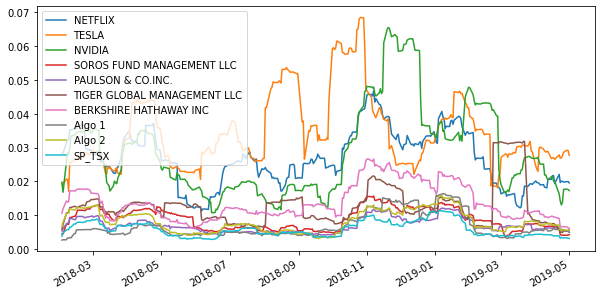

In [451]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
all_combined.rolling(window=21).std().plot(figsize=(10, 5))

### Calculate and plot the correlation

<AxesSubplot:>

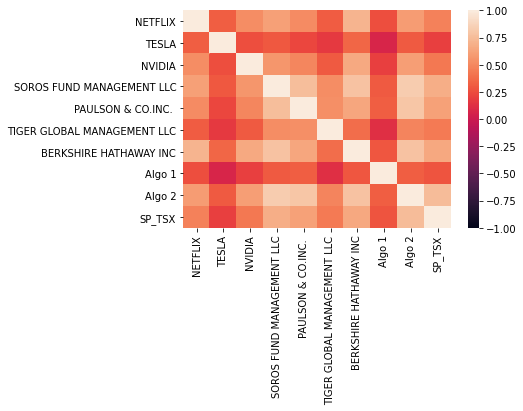

In [452]:
# Calculate and plot the correlation
correlation_all = all_combined.corr() 

import seaborn as sns

sns.heatmap(correlation_all, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of NETFLIX'}>

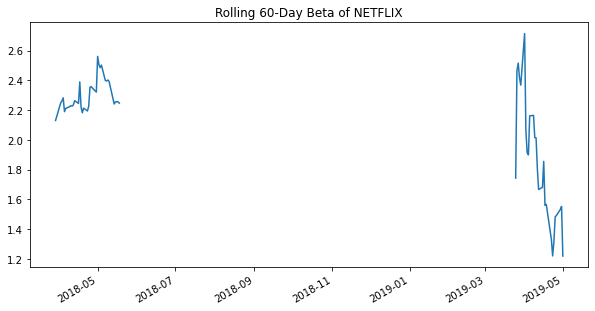

In [453]:
# Calculate and plot Beta

# Plot beta trend
rolling_covariance = nasdaq_daily_returns['NETFLIX'].rolling(window=60).cov(portfolio1_daily_returns['SP_TSX'])
rolling_variance = portfolio1_daily_returns['SP_TSX'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(10, 5), title='Rolling 60-Day Beta of NETFLIX')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [454]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (all_combined.mean() * 252) / annualized_std
sharpe_ratios

NETFLIX                        1.086561
TESLA                         -0.175173
NVIDIA                         0.009844
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
SP_TSX                         0.034651
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

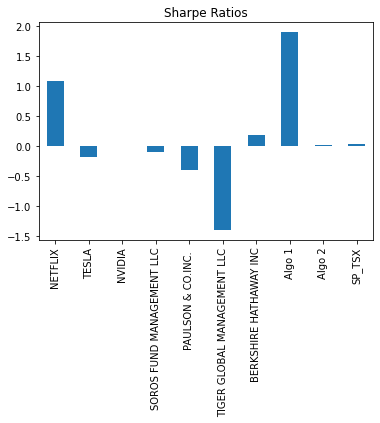

In [455]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios") 

### How does your portfolio do?

Write your answer here!

In [456]:
print('Netflix was a smart investment, but it still cannot outperform the Algo1 portfolio, however..')

Netflix was a smart investment, but it still cannot outperform the Algo1 portfolio, however..


In [457]:
# Calculate standard deviaton for all investments for each portfolio
portfolio1_std_annual = portfolio1_daily_returns.std() * np.sqrt(252)
myportfolio_std_annual = nasdaq_daily_returns.std() * np.sqrt(252)

In [458]:
# Calculate sharpe ratios
portfolio1_sharpe_ratios = (portfolio1_daily_returns.mean() * 252) / (portfolio1_std_annual)
myportfolio_sharpe_ratios = (nasdaq_daily_returns.mean() * 252) / (myportfolio_std_annual)

In [459]:
# Averaging sharpe ratios
portfolio1_sharpe_avg = portfolio1_sharpe_ratios.mean()
myportfolio_sharpe_avg = myportfolio_sharpe_ratios.mean()

# Display results
print("Initial portfolio sharpe ratio average:", portfolio1_sharpe_avg)
print("My sharpe ratio average:", myportfolio_sharpe_avg)

Initial portfolio sharpe ratio average: 0.30651230842900956
My sharpe ratio average: 0.5657178718318073


In [460]:
myportfolio_sharpe_avg > portfolio1_sharpe_avg

True

In [461]:
print ('.. my portfolio was the smarter investment, based on risk to reward ratio.')

.. my portfolio was the smarter investment, based on risk to reward ratio.
